In [1]:
import yaml
import pandas as pd
import json
import matplotlib.pyplot as plt
import datetime as dt

from pynytimes import NYTAPI


Heute=dt.datetime.now().strftime('%y-%m-%d')


with open("2022-05-24_NYtimes_key.yaml") as file:
    keys = yaml.load(file, Loader=yaml.FullLoader)
    
key=keys["NYtimes"]['key']
nyt = NYTAPI(key, parse_dates=True)



def writeFile(filename, data):
    def defaultconverter(o):
        if isinstance(o, dt.datetime):
            return o.__str__()

    with open(filename+".json", 'w') as fp:
        json.dump(data,fp, default = defaultconverter)
    

# Run API

In [40]:
def runSerach(SuchName):
    articles = nyt.article_search(
        query =SuchName.strip(),
        results = 500, ### For testing only 2 or so
        dates = {
            "begin": dt.datetime(2020, 1, 1),
            "end": dt.datetime(2023, 5, 5)
        },
        options = {
            "sort": "newest", ## or oldest
            "sources": [
                "New York Times"
                #"AP",
                #"Reuters",
                #"International Herald Tribune"
            ]
        }
    )
    
    SuchName = ''.join(filter(str.isalnum, SuchName))
    filename=Heute+"_NYtimes_"+SuchName
    
    print(SuchName,len(articles))
    
    writeFile(filename,articles)
    #return pd.DataFrame(articles)



In [9]:
### This strip thing is necessary for some terms


SuchListe=[""" "3d printing" """.strip(),""" "Voice over IP" """.strip(),""" "Internet Telephony" """.strip(),
           """ "virtual reality" """.strip(),""" "gene therapy" """.strip(),
           """ "3d printing" """.strip(),"superconductivity", "microalgae",
           "nanotechnology","nano*", "Nanoparticle encapsulation","Smart City", "ChatGPT"]


print(SuchListe[-1])

SuchListe

ChatGPT


['"3d printing"',
 '"Voice over IP"',
 '"Internet Telephony"',
 '"virtual reality"',
 '"gene therapy"',
 '"3d printing"',
 'superconductivity',
 'microalgae',
 'nanotechnology',
 'nano*',
 'Nanoparticle encapsulation',
 'Smart City',
 'ChatGPT']

In [41]:
#run only one tech
runSerach(SuchListe[-1])

C:\Users\mr\miniconda3\envs\PyMax\lib\site-packages\pynytimes\helpers\article_search.py:16: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


ChatGPT 324


In [42]:
#run the entire list --> This takes a lot of time...

#for SuchName in SuchListe:
#    runSerach(SuchName)

<AxesSubplot: title={'center': 'ChatGPT'}, xlabel='pub_date'>

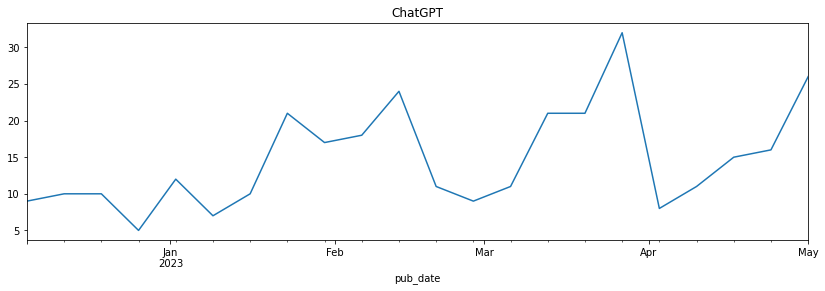

In [48]:
sample="7D"
filename=Heute+"_NYTimes_"+SuchListe[-1]+".json"
df=pd.read_json(filename, convert_dates=['pub_date']).drop_duplicates("web_url",keep="first")
example=df.set_index("pub_date").resample(sample).size().rename(SuchListe[-1])
example.plot(figsize=(14,4),title=SuchListe[-1])